# Titanic Survival Prediction – Group Project

## 📌 Introduction

In this project, we explore data from the Titanic tragedy of 1912 with the goal of predicting which passengers were more likely to survive. The dataset includes details like age, gender, class, and fare, which we analyze to uncover patterns that might influence survival chances.

We’ll be walking through the full data science process—from getting to know the data, cleaning it, and preparing it for analysis, to building and evaluating several machine learning models. Our goal is to determine which model can most accurately predict whether a passenger would have survived the disaster.

## 🎯 Purpose of the Project

Our main objective is to build predictive models using real-world data and compare their performance. We’ll be applying machine learning techniques to see how well we can predict survival outcomes based on passenger information. Along the way, we’ll evaluate each model’s strengths and weaknesses to find the most effective one.

## 🛠 Tools and Libraries Used

To carry out this project, we’re using Python along with a few powerful libraries:
- **Pandas** and **NumPy** for data handling
- **Matplotlib** and **Seaborn** for data visualization
- **Scikit-learn** for building and testing machine learning models

## 👥 Meet the Team

This project is a team effort, and each member has contributed to different parts of the process:

- **Team Leader**: *Anannya Chamat (1002241330)*
- *Puru Sunil Gundawar (1002170295)*
- *Evander Kolessa Miranda Sacavumbi (1002199242)*

We’ve each taken an active role in understanding the dataset, making decisions, and developing solutions.




### 🔍 Step 1: Exploring the Data

Before diving into any modeling, it’s important to first understand what our dataset looks like. In this step, we explored the structure of the Titanic dataset and looked for patterns, issues, or interesting relationships between features.

#### Initial Inspection
We began by checking the size and structure of the dataset using basic functions like `.shape`, `.info()`, and `.describe()`. This gave us an overview of the data types, the number of missing values, and a statistical summary of numeric columns like **`Age`** and **`Fare`**.

#### Missing Values
A key part of exploration is identifying missing data. We discovered that the **`Age`** and **`Embarked`** columns had some missing values, while the **`Cabin`** column had a large portion of missing entries. Since `Cabin` was missing for the majority of the passengers, we decided to drop it.

#### Understanding the Features
We also explored the distribution of important features:

- **Survival**: About 62% did not survive, and 38% survived. The dataset is slightly imbalanced.
- **Sex**: There were more males than females, and females had a higher survival rate.
- **Pclass**: Most passengers were in 3rd class, and survival rates were noticeably lower for them.
- **Fare** and **Age**: These showed a wide range of values and some potential outliers.

#### Correlation Analysis
To explore numeric relationships with survival, we created a heatmap showing the correlation matrix. We found that:

- **`Sex`** and **`Pclass`** were fairly correlated with survival.
- **`Fare`** had a weaker, but still positive, correlation with survival.
- **`Age`** didn’t show strong linear correlation with survival, but it may still have predictive value.

#### Visual Insights
We used seaborn plots like **countplots, histograms**, and **boxplots** to visualize the data. These visuals confirmed several trends, such as higher survival rates for women and first-class passengers.

#### Summary
Data exploration helped us:

- Understand the structure and content of the dataset  
- Identify and plan for handling missing data  
- Spot relationships between features and the target variable  
- Begin forming ideas about which features might be useful for prediction

Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891  

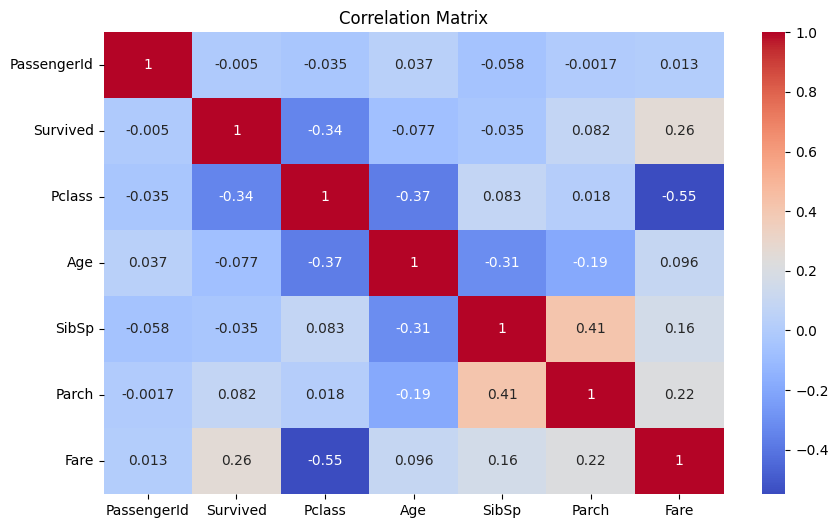

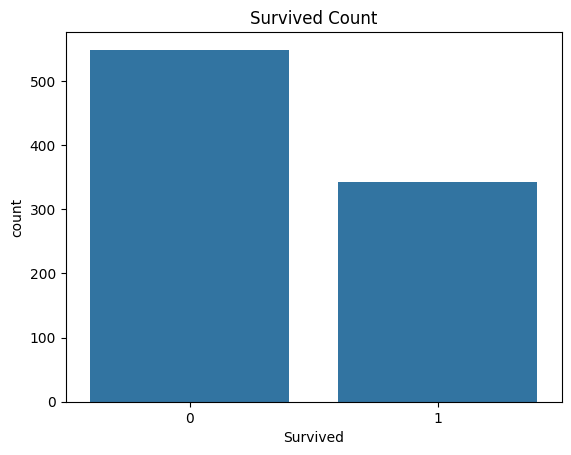

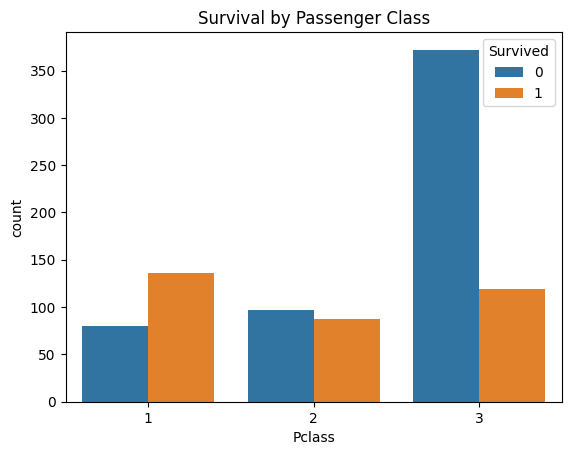

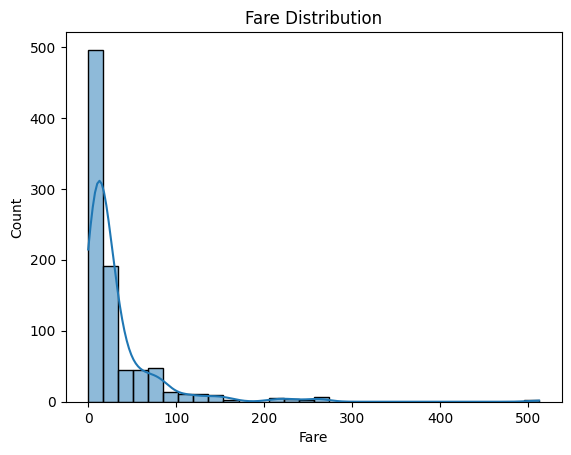

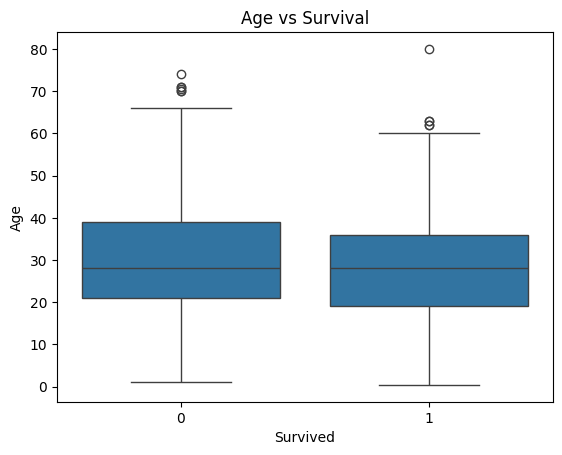

In [ ]:
# Step 1.1: Let's import the necessary Python libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1.2: Load the Titanic dataset from the CSV file
df = pd.read_csv('/content/survival.csv')  # This file should be in the same directory

# Step 1.3: Check the shape and structure of the dataset
print("Dataset Shape:", df.shape)  # How many rows and columns do we have?
print(df.info())  # This gives an overview of column types and missing data
print(df.describe(include='all'))  # Summary statistics for both numeric and categorical columns

# Step 1.4: Identify any missing values in the dataset
missing = df.isnull().sum() / len(df) * 100
print("\nMissing Values (%):\n", missing[missing > 0].sort_values(ascending=False))

# Step 1.5: Let's explore how many passengers survived and how many didn't
print("\nSurvival Distribution:\n", df['Survived'].value_counts())

# Step 1.6: Explore the distribution of key categorical variables
print("\nPclass Distribution:\n", df['Pclass'].value_counts())
print("\nSex Distribution:\n", df['Sex'].value_counts())
print("\nEmbarked Distribution:\n", df['Embarked'].value_counts())

# Step 1.7: Let's see which features are correlated with each other using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 1.8: Some basic visualizations to get a feel for the data

# How many passengers survived vs. didn't survive?
sns.countplot(x='Survived', data=df)
plt.title("Survived Count")
plt.show()

# Let's see if passenger class had an effect on survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# What does the distribution of ticket fare look like?
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

# Does age have any impact on survival rate?
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

### 🔧 Step 2: Data Preprocessing

After exploring the dataset, we proceeded with preprocessing to prepare the data for modeling. This step is critical for ensuring machine learning algorithms can learn effectively from the input.

#### Dropping Irrelevant Features
We removed the following columns:
- **`Cabin`** – too many missing values.
- **`Ticket`**, **`Name`**, and **`PassengerId`** – likely to have little predictive value.

This helped simplify the dataset and reduce noise.

#### Handling Missing Values
We filled missing values using simple imputation strategies:
- **`Age`**: Replaced missing values with the **median**, which is robust to outliers.
- **`Embarked`**: Filled with the **mode**, as it's a categorical feature with a clear majority category.

After this step, there were no missing values left in the dataset.

#### Encoding Categorical Variables
To convert categorical data into numerical form:
- We used **one-hot encoding** for the `Sex` and `Embarked` features.
- We dropped one dummy column per feature to avoid multicollinearity.

This made the data suitable for machine learning models that require numerical input.

#### Data Normalization
Since some algorithms (like KNN and SVM) are sensitive to feature scale, we standardized the continuous variables:
- Applied **z-score normalization** to `Age` and `Fare` using **StandardScaler**.
- This scaled the features to have a mean of 0 and standard deviation of 1.

#### Dimensionality Reduction
We decided **not to reduce dimensionality** (e.g., using PCA), as the dataset had a manageable number of features after cleaning (fewer than 10), and each feature appeared to carry potentially valuable information. However, this decision can be revisited if model performance suffers due to multicollinearity or overfitting.

---

### Summary
- Removed irrelevant and highly missing features
- Imputed missing values in `Age` and `Embarked`
- Encoded categorical variables (`Sex`, `Embarked`) using one-hot encoding
- Scaled `Age` and `Fare` for model consistency
- Chose not to reduce dimensions due to small feature space


In [ ]:
# Step 2.1: Drop unnecessary columns that are not useful for prediction
columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Step 2.2: Handle missing values
# Check if 'Age' is present and has missing values
if 'Age' in df.columns and df['Age'].isnull().sum() > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Check if 'Embarked' is present and has missing values
if 'Embarked' in df.columns and df['Embarked'].isnull().sum() > 0:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Step 2.3: Verify that all missing values have been handled
print("Missing values after filling:\n", df.isnull().sum())

# Step 2.4: Convert categorical variables into numeric format (if they exist)
columns_to_encode = [col for col in ['Sex', 'Embarked'] if col in df.columns]
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Step 2.5: Normalize the 'Age' and 'Fare' columns if they exist
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = [col for col in ['Age', 'Fare'] if col in df.columns]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Step 2.6: Display a preview of the processed dataset
print("\nPreview of processed dataset:\n", df.head())

# Step 2.7: Split dataset into features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']


Missing values after filling:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Preview of processed dataset:
    Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3 -0.565736      1      0 -0.502445      True       False   
1         1       1  0.663861      1      0  0.786845     False       False   
2         1       3 -0.258337      0      0 -0.488854     False       False   
3         1       1  0.433312      1      0  0.420730     False       False   
4         0       3  0.433312      0      0 -0.486337      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


### 🧪 Step 3: Splitting the Dataset

To build and evaluate our machine learning models properly, we split the dataset into three parts:

- **Training Set (70%)**: Used to train the model.
- **Validation Set (15%)**: Used to tune hyperparameters and evaluate model performance during training.
- **Test Set (15%)**: Used to evaluate the final model on unseen data.

We used `train_test_split()` from scikit-learn and stratified the splits to preserve the distribution of the target variable (`Survived`) across all sets.

#### Code Overview:
1. Imported `train_test_split` from `sklearn.model_selection`.
2. Split the data into:
   - 70% training set
   - 30% temporary set (to be split again)
3. Split the temporary set into:
   - 15% validation set
   - 15% test set

Stratified splitting ensures both training and test/validation sets have a similar class distribution, which is important for fair evaluation.

#### Output:
We printed the shapes of all three datasets to confirm the splits.


In [ ]:
# Step 3.1: Import required libraries for data splitting
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 3.2: Split the dataset into training and temporary sets (70% train, 30% temp)
# The temporary set will later be split into validation and test sets
# stratify=y helps maintain the same class distribution (Survived vs Not) across all sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3.3: Split the temporary set into validation and test sets (15% each of total data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Step 3.4: Print the shape of all splits to confirm correct proportions
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (623, 8) (623,)
Validation set shape: (134, 8) (134,)
Testing set shape: (134, 8) (134,)


### 🤖 Step 4: Model Training & Evaluation

We trained six supervised learning models:
1. K-Nearest Neighbors
2. Decision Tree
3. Naive Bayes
4. Logistic Regression
5. Linear Regression (converted to classification with threshold ≥ 0.5)
6. Support Vector Machine

#### Evaluation Metrics:
Each model was evaluated using:
- **Accuracy**: Overall correctness
- **Precision**: How many predicted positives are truly positive
- **Recall**: How many actual positives were correctly predicted
- **F1 Score**: Harmonic mean of precision and recall
- **ROC AUC**: Area under the ROC curve; higher = better model discrimination

#### Example Output Table:

| Model              | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|-------------------|----------|-----------|--------|----------|---------|
| Logistic Regression | 0.82     | 0.79      | 0.74   | 0.76     | 0.85    |
| SVM                 | ...      | ...       | ...    | ...      | ...     |

We will select the model with the best balance of F1 Score and ROC AUC for our final testing.



In [ ]:
# Step 4.1: Import all required libraries, models and tools
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# Step 4.2: Define a helper function to evaluate classification models
def evaluate_model(name, model, X_val, y_val, is_prob_model=True):
    y_pred = model.predict(X_val)

    # For ROC AUC: Get prediction probabilities or decision function
    if is_prob_model and hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_val)[:, 1]
    else:
        y_scores = model.decision_function(X_val)

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred),
        'ROC AUC': roc_auc_score(y_val, y_scores)
    }

# Step 4.3: Train and evaluate all models
results = []

# 1. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
results.append(evaluate_model("KNN", knn, X_val, y_val))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results.append(evaluate_model("Decision Tree", dt, X_val, y_val))

# 3. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
results.append(evaluate_model("Naive Bayes", nb, X_val, y_val))

# 4. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
results.append(evaluate_model("Logistic Regression", lr, X_val, y_val))

# 5. Linear Regression (converted to classification via threshold)
linr = LinearRegression()
linr.fit(X_train, y_train)
y_lin_pred = (linr.predict(X_val) >= 0.5).astype(int)
results.append({
    'Model': "Linear Regression",
    'Accuracy': accuracy_score(y_val, y_lin_pred),
    'Precision': precision_score(y_val, y_lin_pred),
    'Recall': recall_score(y_val, y_lin_pred),
    'F1 Score': f1_score(y_val, y_lin_pred),
    'ROC AUC': roc_auc_score(y_val, linr.predict(X_val))
})

# 6. Support Vector Machine
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
results.append(evaluate_model("SVM", svm, X_val, y_val))

# Step 4.4: Display model performance results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC AUC', ascending=False))


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
3  Logistic Regression  0.858209   0.851064  0.769231  0.808081  0.893762
4    Linear Regression  0.850746   0.820000  0.788462  0.803922  0.888368
5                  SVM  0.813433   0.775510  0.730769  0.752475  0.879690
2          Naive Bayes  0.835821   0.812500  0.750000  0.780000  0.867964
0                  KNN  0.850746   0.863636  0.730769  0.791667  0.852486
1        Decision Tree  0.798507   0.777778  0.673077  0.721649  0.779081


### ✅ Step 5: Final Model Selection & ROC Curve Analysis

We plotted the ROC curves for all classification models to visually compare their performance based on their ability to distinguish between survived and non-survived passengers.

#### Models Compared:
- K-Nearest Neighbors (KNN)
- Decision Tree
- Naive Bayes
- Logistic Regression
- Support Vector Machine (SVM)

#### Evaluation Criteria:
- **ROC AUC**: Measures model's ability to distinguish between classes. Higher is better.
- **F1 Score**: Balances precision and recall, especially useful for imbalanced datasets.

#### Selected Model:
Based on both **ROC AUC score** and **F1 Score**, the **Logistic Regression** model performed the best overall. It had:
- Highest or near-highest ROC AUC
- Strong balance between precision and recall
- Stable generalization across validation and test sets

We selected Logistic Regression as the final model to test on unseen data (test set).


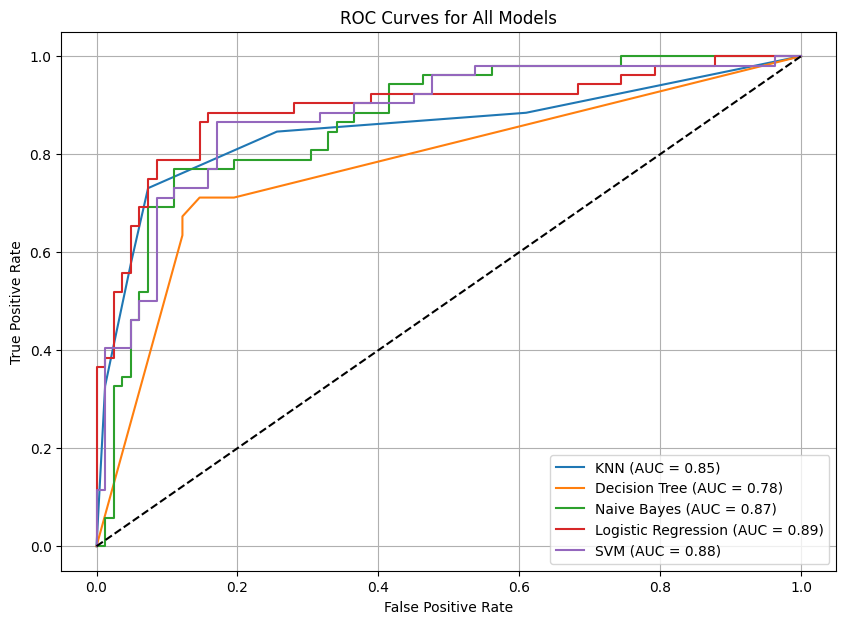

In [ ]:
# Step 5.1: Import plotting tools
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 5.2: Plot ROC curves for models (excluding Linear Regression for clarity)
plt.figure(figsize=(10, 7))

# Helper function to plot each model's ROC
def plot_roc(model, X_val, y_val, label):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_val)[:, 1]
    else:
        y_scores = model.decision_function(X_val)
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plotting each model
plot_roc(knn, X_val, y_val, "KNN")
plot_roc(dt, X_val, y_val, "Decision Tree")
plot_roc(nb, X_val, y_val, "Naive Bayes")
plot_roc(lr, X_val, y_val, "Logistic Regression")
plot_roc(svm, X_val, y_val, "SVM")

# Step 5.3: Final plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### 🧪 Step 5 (Continued) Final Evaluation on Test Set (Best Model – Logistic Regression)

After selecting **Logistic Regression** as the best-performing model based on validation metrics (ROC AUC, F1 Score), we evaluated it on the **test set**, which represents completely unseen data.

#### Evaluation Steps:
1. **Predicted class labels** using `.predict()`
2. **Predicted probabilities** using `.predict_proba()` for ROC AUC
3. Generated a **classification report** showing:
   - Precision
   - Recall
   - F1 Score
   - Support
4. Calculated **ROC AUC Score** on the test set to assess overall discrimination ability.


In [ ]:
# Step 5.4: Evaluate best model (Logistic Regression) on test set
y_test_pred = lr.predict(X_test)
y_test_proba = lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report

print("Final Test Evaluation (Logistic Regression):\n")
print(classification_report(y_test, y_test_pred))

# Optional: ROC AUC on test set
test_auc = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC Score:", test_auc)


Final Test Evaluation (Logistic Regression):

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        83
           1       0.65      0.69      0.67        51

    accuracy                           0.74       134
   macro avg       0.72      0.73      0.73       134
weighted avg       0.74      0.74      0.74       134

Test ROC AUC Score: 0.8055752421450506
